# Now viewing $n_0 = 1\times 10^{-10} \text{particles}/AU^3$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import pandas as pd

script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.989e30 ## kg
G = 6.674e-11  ## m^3*kg^-1*s^-2
nsamples = 99


In [2]:
def au_to_meters(au):
    meters = au * 149597870700
    return meters

def meters_to_au(meters):
    au = meters / 149597870700
    return au

def years_to_seconds(years):
    seconds = years * 31557600
    return seconds

def seconds_to_years(seconds):
    years = seconds / 31557600
    return years

def auyr_to_ms(au_per_year):
    m_per_s = au_per_year * (149597870700 / 31557600)
    return m_per_s

def ms_to_auyr(m_per_s):
    au_per_year = m_per_s * (31557600 / 149597870700)
    return au_per_year

In [3]:
import h5py
import pandas as pd

# Define the file path
file_path = '/Users/richardanderson/Downloads/planetesimal_project/simpledata.h5'

# Initialize a dictionary to hold the data
data_dict = {col: [] for col in ["KE", "PE", "ax", "ay", "energy", "time", "vx", "vy", "x", "y"]}

# Open the HDF5 file and populate the dictionary
with h5py.File(file_path, 'r') as file:
    for key in file.keys():
        # Extract the prefix and index from the key
        prefix, index = key.split('_')
        if prefix in data_dict:
            data_dict[prefix].append(file[key][:])

# Convert lists of arrays to DataFrames, then concatenate them into a single DataFrame
for key in data_dict:
    data_dict[key] = pd.DataFrame(data_dict[key])

# Concatenate all DataFrames along columns
df = pd.concat(data_dict, axis=1)

# Optionally, reset the index to have a single index instead of a multi-index
df.columns = df.columns.get_level_values(0)

# Display the DataFrame
df



,KE,PE,ax,ay,energy,time,vx,vy,x,y
0,67312.500000,-67200.000000,0.000000e+00,0.000000e+00,112.500000,0.000000e+00,169.803127,325.256665,-1.975385e+15,0.000000e+00
1,67950.900476,-67836.904227,3.433671e-11,-6.302071e-13,113.996250,1.104516e+11,173.587093,325.221958,-1.956421e+15,3.592385e+13
2,73473.782428,-73359.786667,3.654076e-11,-7.396067e-12,113.995761,1.104516e+12,208.934210,321.393934,-1.766479e+15,3.578705e+14
3,74049.055494,-73935.059836,3.668168e-11,-8.269747e-12,113.995658,1.214968e+12,212.978350,320.528210,-1.743179e+15,3.933220e+14
4,74613.223614,-74499.228069,3.679484e-11,-9.166213e-12,113.995544,1.325419e+12,217.036516,319.564701,-1.719431e+15,4.286726e+14
...,...,...,...,...,...,...,...,...,...,...
95,53600.185307,-53486.199965,-1.019033e-11,-1.899279e-11,113.985342,1.049290e+13,322.895649,54.210430,1.173593e+15,2.186862e+15
96,53126.572724,-53012.587382,-1.022308e-11,-1.854237e-11,113.985342,1.060335e+13,321.768195,52.138031,1.209195e+15,2.192734e+15
97,52659.974145,-52545.988804,-1.024766e-11,-1.810354e-11,113.985342,1.071381e+13,320.637587,50.114728,1.244673e+15,2.198381e+15
98,52200.319392,-52086.334050,-1.026463e-11,-1.767611e-11,113.985342,1.082426e+13,319.504696,48.139254,1.280025e+15,2.203807e+15


In [4]:
def Nexp(v0, n0):
    f = v0/c_s
    return np.floor(((np.pi*n0*rmax**3)/(9*f))*(3*f**2+16))
v0 = {1:5, 2: 10, 3: 15}
for i in [1, 2, 3]:
    print(f"Nexp for v0 = {v0[i]}", Nexp(v0[i], 1e-10))

Nexp for v0 = 5 47148.0
Nexp for v0 = 10 23584.0
Nexp for v0 = 15 15733.0


In [15]:
v = np.sqrt(df.vx.to_numpy()**2+df.vy.to_numpy()**2)
t = df.time.to_numpy()

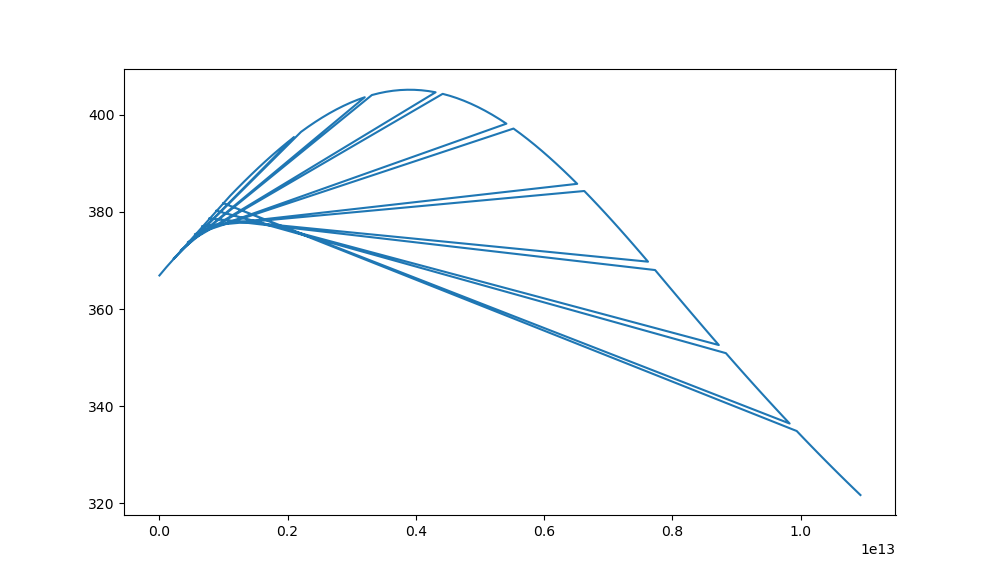

In [30]:
%matplotlib widget
plt.clf()
plt.plot(t, v)
plt.show()

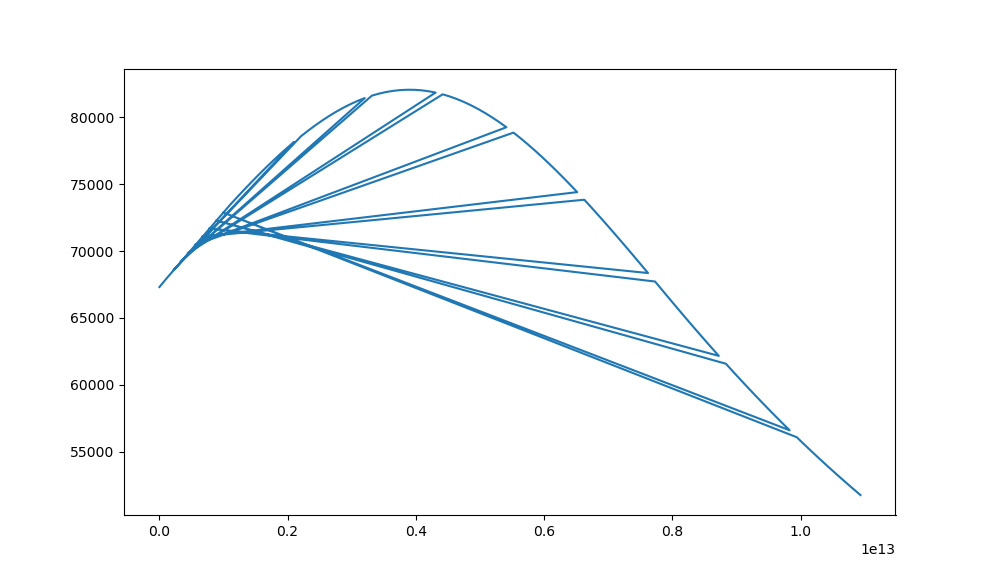

In [31]:
plt.clf()
plt.plot(df.time, df.KE)
plt.show()

In [9]:
plt.scatter(5, np.mean(v[1]))
plt.scatter(10, np.mean(v[2]))
plt.scatter(15, np.mean(v[3]))
plt.title('Average velocity for $\\quad n_0 = 1\\times10^{-10}\\ \\text{particles}/AU^3$')
plt.xlabel('$v_0 \\ \\left(\\frac{{m}}{{s}}\\right)$')
plt.ylabel('$\\left\\langle v \\right\\rangle$')
plt.show()

NameError: name 'v' is not defined

In [4]:
plt.scatter(5, np.mean(Ecluster[1]))
plt.scatter(10, np.mean(Ecluster[2]))
plt.scatter(15, np.mean(Ecluster[3]))
plt.title('Average Energy for $\\quad n_0 = 1\\times10^{-10}\\ \\text{particles}/AU^3$')
plt.xlabel('$v_0 \\ \\left(\\frac{{m}}{{s}}\\right)$')
plt.ylabel('$\\left\\langle E \\right\\rangle$')
plt.show()

NameError: name 'Ecluster' is not defined

In [7]:
v0 = {1:5, 2: 10, 3: 15}

for i in [1, 2, 3]:
    print(f'Averge Energy For v0 = {v0[i]}: ', f'{np.mean(Ecluster[i]):.2f}', ' (m/s)^2')

print('')

for i in [1, 2, 3]:
    print(f'Average velocity for v0 = {v0[i]}: ', f'{np.mean(v[i]):.2f}', ' m/s')

print('')
  
for i in [1, 2, 3]:   
    print(f'Average r coordinate for v0 = {v0[i]}: ', f'{np.mean(meters_to_au(r[i])):.2f}', ' AU')

print('')

Averge Energy For v0 = 5:  14.39  (m/s)^2
Averge Energy For v0 = 10:  51.84  (m/s)^2
Averge Energy For v0 = 15:  -59.37  (m/s)^2

Average velocity for v0 = 5:  394.16  m/s
Average velocity for v0 = 10:  392.33  m/s
Average velocity for v0 = 15:  430.02  m/s

Average r coordinate for v0 = 5:  11414.12  AU
Average r coordinate for v0 = 10:  11538.85  AU
Average r coordinate for v0 = 15:  9451.35  AU



In [7]:
def get_bmax(v0): #returns the maximum impact parameter for particles impacting the edge of the collapsing cloud at time t
    R = au_to_meters(rmax) ## - meters
    return R*np.sqrt(1+(4*c_s**2)/(v0**2)) #meters


In [6]:
get_bmax(5)

NameError: name 'rmax' is not defined

In [9]:
def get_params(b, v0, R): # returns the components of the velocity vector as the particle enters the mass distribution
    v = np.sqrt(v0**2+4*c_s**2) ##m/s
    psi = G*M/(au_to_meters(R)*v0**2) ##dimensionless
    theta = math.acos(meters_to_au(b)/(R*np.sqrt(1+(4*c_s**2/v0**2)))) 
    vr = v*np.sin(theta) 
    vazimuthal = v*np.cos(theta) 
    return [vr, vazimuthal]


In [10]:
for i in [1, 2, 3]:
    print(f'Impact paramter for v0 = {v0[i]}:', f'{meters_to_au(get_bmax(v0[i])):.2f}', 'AU')

print('')

for i in [1, 2, 3]:
    print(f'Initial radial Velocity Component for v0 = {v0[i]}: ', f'{get_params(get_bmax(v0[i]), v0[i], rmax)[0]:.2f}', 'm/s')

print('')
  
for i in [1, 2, 3]:   
    print(f'Initial azimuthal Velocity Component for v0 = {v0[i]}: ', f'{get_params(get_bmax(v0[i]), v0[i], rmax)[1]:.2f}', 'm/s')

print('')

Impact paramter for v0 = 5: 968269.65 AU
Impact paramter for v0 = 10: 484269.86 AU
Impact paramter for v0 = 15: 322996.56 AU

Initial radial Velocity Component for v0 = 5:  0.00 m/s
Initial radial Velocity Component for v0 = 10:  0.00 m/s
Initial radial Velocity Component for v0 = 15:  0.00 m/s

Initial azimuthal Velocity Component for v0 = 5:  366.64 m/s
Initial azimuthal Velocity Component for v0 = 10:  366.74 m/s
Initial azimuthal Velocity Component for v0 = 15:  366.91 m/s



In [8]:
for i in [1, 2, 3]:
    b = get_bmax(v0[i])
    v_0 = v0[i]
    rm = meters_to_au((G*M)/(2*c_s**2))
    plt.scatter(i, get_params(b, v_0, rm)[0])

plt.show()

NameError: name 'v0' is not defined

In [10]:
rmax = meters_to_au((G*M)/(2*c_s**2))

In [12]:
meters_to_au(get_bmax(5))

968269.6484199968

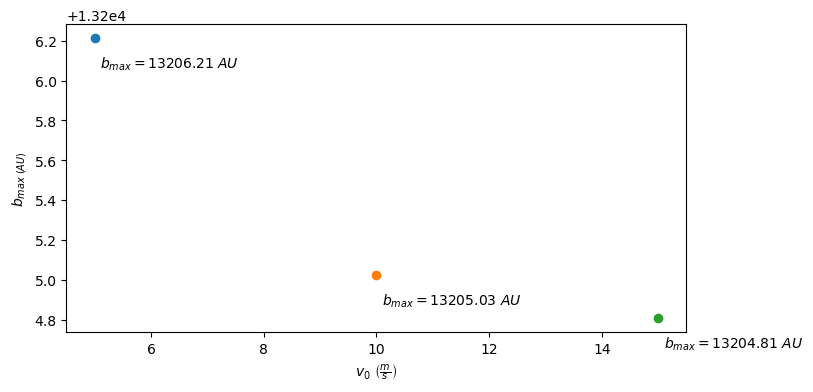

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in [1, 2, 3]:
    ax.scatter(v0[i], meters_to_au(get_bmax(v0[i])))
    ax.text(v0[i]+1e-1, meters_to_au(get_bmax(v0[i]))-0.15, f'$b_{{max}} = {meters_to_au(get_bmax(v0[i])):.2f}\\ AU$')
plt.xlabel('$v_0\\ \\left(\\frac{{m}}{{s}}\\right)$')
plt.ylabel('$b_{max\\ \\left(AU\\right)}$')
plt.show()

bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
bmax =  1975411075259945.2
b

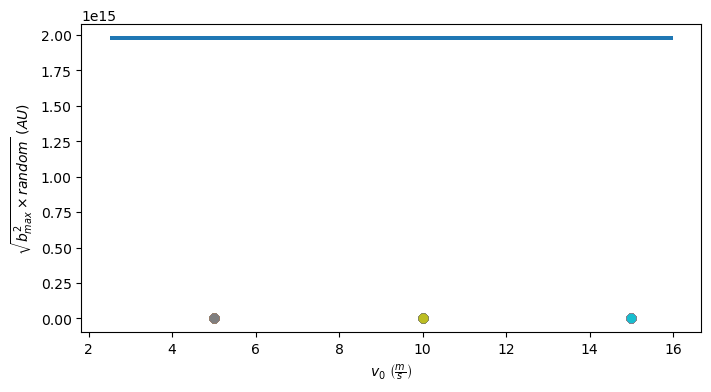

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
b = {1: [], 2: [], 3: []}
nums = []
for j in range(0, 100):
    for i in [1, 2, 3]:
        randnum = np.random.random()
        nums.append(np.sqrt(randnum))
        b[i].append(np.sqrt(randnum*meters_to_au(get_bmax(v0[i]))**2))
        ax.hlines(y = get_bmax(v0[i]), xmin=2.5, xmax=16)
        ax.scatter(v0[i], b[i][j])
        #ax.text(v0[i], b+50, f'$b = {b:.2f}\\ AU$')
    print("bmax = ", get_bmax(v0[i]))
plt.xlabel('$v_0\\ \\left(\\frac{{m}}{{s}}\\right)$')
plt.ylabel('$\sqrt{b_{max}^2\\times random}\\ \\left(AU\\right)$')
plt.show()

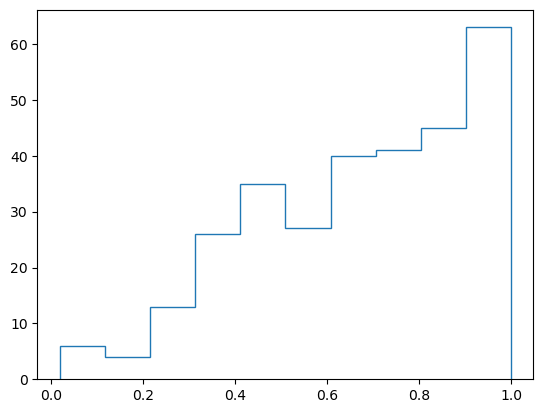

In [74]:
plt.hist(nums, bins = 'auto', histtype = 'step')
plt.show()

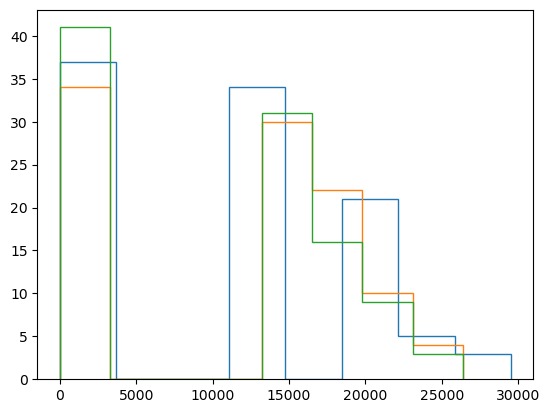

In [64]:
for i in [1, 2, 3]:
    plt.hist(b[i], bins = 'auto', histtype = 'step')

plt.show()

In [13]:
intvec = np.logspace(-6, 4, 10000)
v_integral = np.loadtxt('./vIntShu.txt')

IntHelper = scipy.interpolate.interp1d(intvec, v_integral, kind = 'cubic')

def get_x_integral(x):
    if x < 10.0**(-6):
        return .467*x**(3/2)
    if x > 100:
        return 2*x
    return IntHelper(x)

In [14]:
c_s = np.sqrt(3.36 * 10.0 ** 3 * 10) * (31557600 / 149597870691)  # AU/YR
c_sms =np.sqrt(3.36 * 10.0 ** 3 * 10) #m/s

def Mp(t):
    return (.98 * c_sms**3 * years_to_seconds(t))/G #kg

def getMenc(r, t):
    x = r/(c_s*t)
    integral = get_x_integral(x)
    return (years_to_seconds(t)*c_sms**3/G)*integral

def Mtot(r, t):
    return getMenc(r, t)+Mp(t)

In [15]:
def trapIntegrateLog(f, xmin, xmax, N):
    s = np.logspace(np.log10(xmin), np.log10(xmax), N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def trapIntegrateLinear(f, xmin, xmax, N):
    s = np.linspace(xmin, xmax, N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def getPhi(r, t): #r in AU, t in years
    rmax_meters = au_to_meters(rmax)
    phi_max = -G*M/rmax_meters
    r_meters = au_to_meters(r)
    if r >= rmax:
        return -G*M/r_meters
    else:
        return phi_max - G*trapIntegrateLog(lambda rp: (Mtot(meters_to_au(rp), t))/rp**2, r_meters, rmax_meters, 10000)

<Figure size 640x480 with 0 Axes>

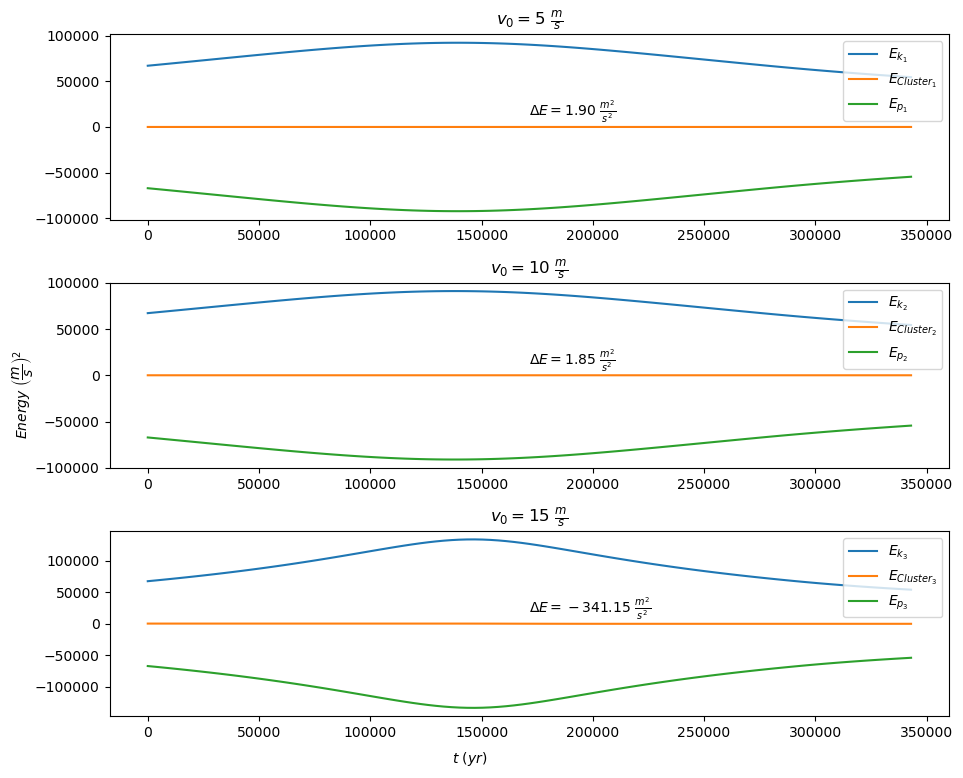

In [16]:
%matplotlib inline
plt.clf()

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

indices = [1, 2, 3]
v0 = {1:5, 2: 10, 3: 15}
for idx, i in enumerate(indices):
    axs[idx].plot(seconds_to_years(t[i]), KE[i], label=f'$E_{{k_{i}}}$')
    axs[idx].plot(seconds_to_years(t[i]), Ecluster[i], label=f'$E_{{Cluster_{i}}}$')
    axs[idx].plot(seconds_to_years(t[i]), PE[i], label=f'$E_{{p_{i}}}$')
    axs[idx].text(0.5, 0.65, f'$\\Delta E = {Ecluster[i][-1]-Ecluster[i][0]:.2f}\\ \\frac{{m^2}}{{s^2}}$', transform=axs[idx].transAxes, verticalalignment='top')
    axs[idx].legend()
    axs[idx].set_title(f'$v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

fig.text(0.5, 0.04, '$t\\ \\left(yr\\right)$', ha='center')
fig.text(0.04, 0.5, '$Energy\\ \\left(\\dfrac{{m}}{{s}}\\right)^2$', va='center', rotation='vertical')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()


<Figure size 640x480 with 0 Axes>

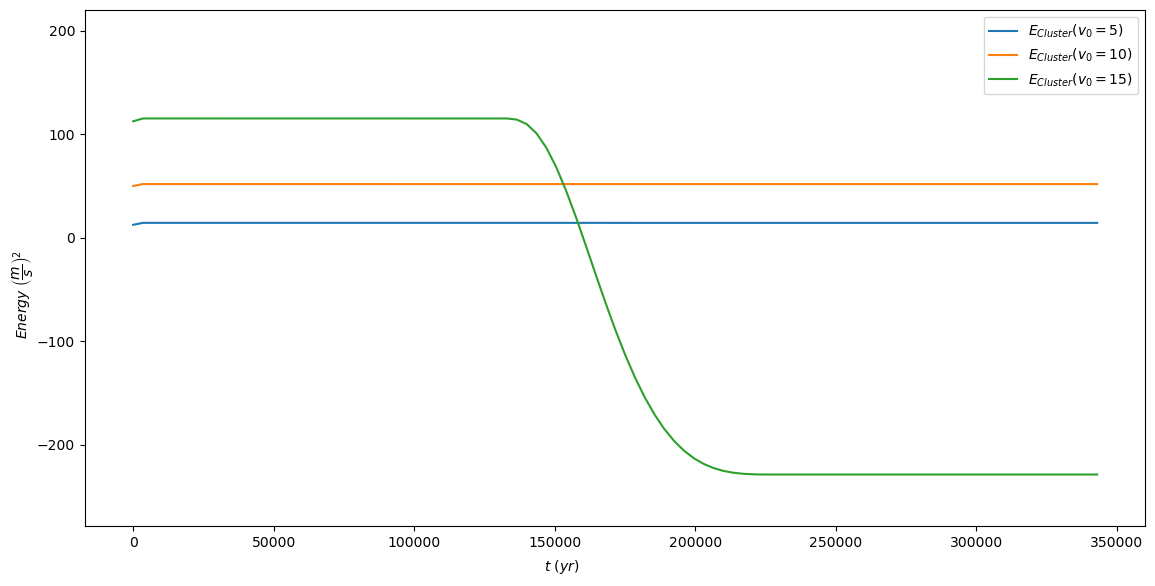

In [18]:
%matplotlib inline
plt.clf()

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

indices = [1, 2, 3]
v0 = {1:5, 2: 10, 3: 15}
for i in indices:
    axs.plot(seconds_to_years(t[i]), Ecluster[i], label=f'$E_{{Cluster}}\\left(v_0 = {v0[i]}\\right)$')
    axs.set_ylim(np.min(Ecluster[3])-50, 220)
    #axs.text(0.5, 0.65 - .01*v0[i], f'$\\Delta E = {Ecluster[i][-1]-Ecluster[i][0]:.2f}\\ \\frac{{m^2}}{{s^2}}$', transform=axs.transAxes, verticalalignment='top')
    axs.legend()
    #axs.set_title(f'$v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

fig.text(0.5, 0.04, '$t\\ \\left(yr\\right)$', ha='center')
fig.text(0.04, 0.5, '$Energy\\ \\left(\\dfrac{{m}}{{s}}\\right)^2$', va='center', rotation='vertical')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()

<Figure size 640x480 with 0 Axes>

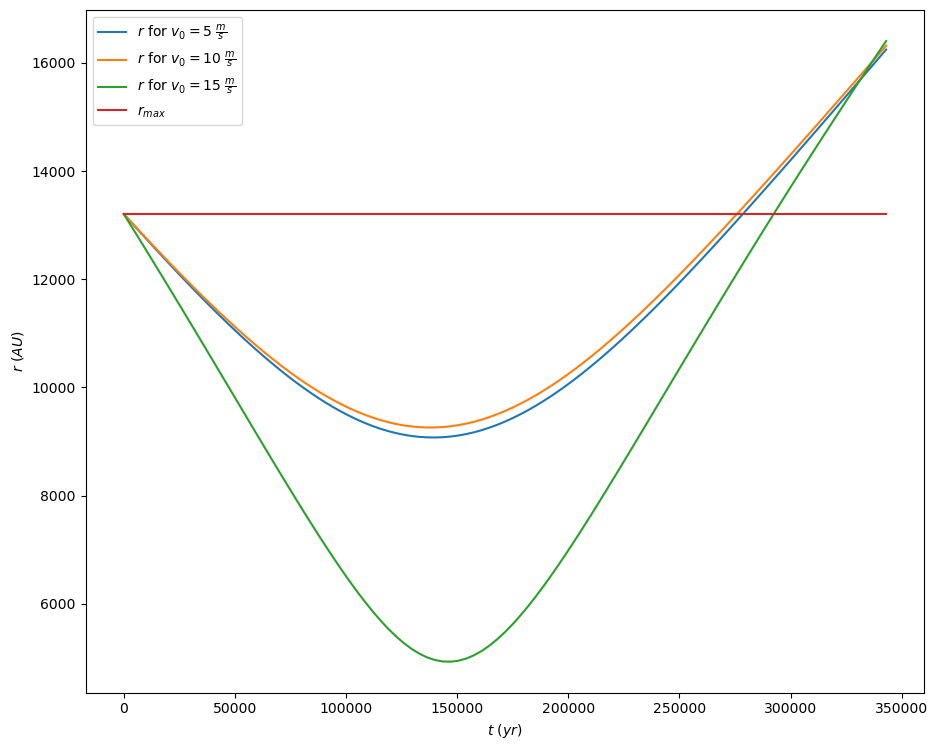

In [19]:
%matplotlib inline

plt.clf()

fig, ax = plt.subplots(figsize=(10, 8))

v0 = {1: 5, 2: 10, 3: 15}
for i in [1,2,3]:
    ax.plot(seconds_to_years(t[i]), meters_to_au(r[i]), label=f'$r$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')
    #ax.plot(seconds_to_years(t[i]), np.array([get_bmax(v0[i]) for _ in range(nsamples)]), label=f'$b_{{max}}\\left(v_0 = {v0[i]}\\right)$')

#ax.set_ylim(np.min(meters_to_au(r[1]))-250, rmax+2000)
ax.plot(seconds_to_years(t[i]), np.array([rmax for _ in range(nsamples)]), label=f'$r_{{max}}$')
ax.legend()
#ax.set_title('Distance vs Time for Different Initial Velocities')
ax.set_xlabel('$t\\ \\left(yr\\right)$')
ax.set_ylabel('$r\\ \\left(AU\\right)$')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()



<Figure size 640x480 with 0 Axes>

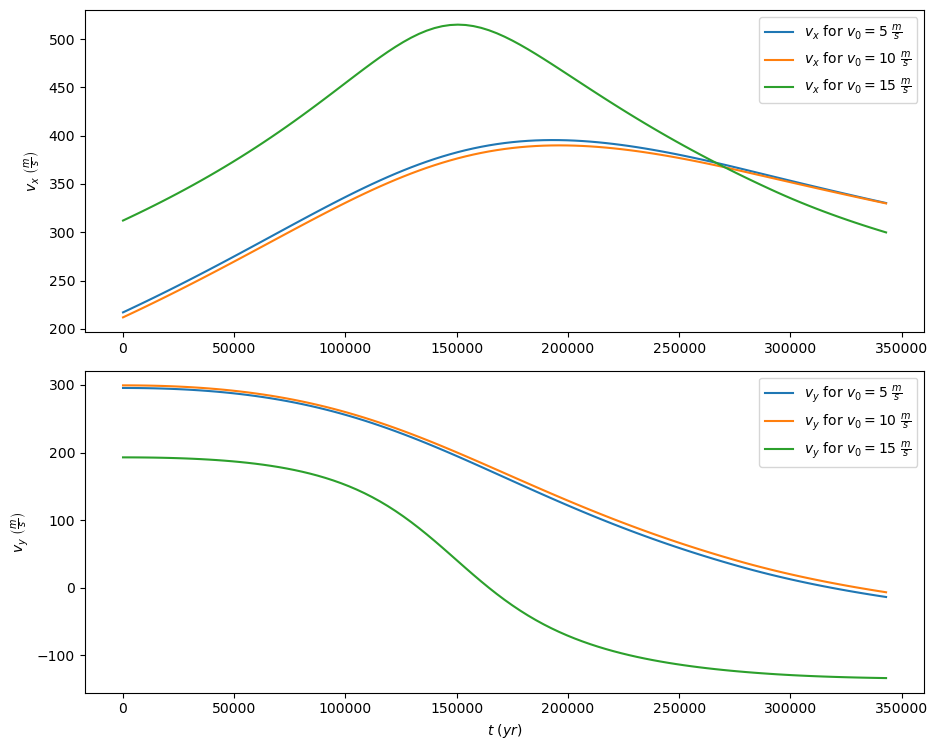

In [20]:
%matplotlib inline

plt.clf()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

v0 = {1: 5, 2: 10, 3: 15}
for i in [1,2,3]:
    ax[0].plot(seconds_to_years(t[i]), vx[i], label=f'$v_x$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')
    ax[0].set_ylabel("$v_x\\ \\left(\\frac{{m}}{{s}}\\right)$")
    ax[1].plot(seconds_to_years(t[i]), vy[i], label=f'$v_y$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')
    ax[1].set_ylabel("$v_y\\ \\left(\\frac{{m}}{{s}}\\right)$")
    ax[0].legend()
    ax[1].legend()

#ax.set_title('Distance vs Time for Different Initial Velocities')
plt.xlabel('$t\\ \\left(yr\\right)$')


plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()

<Figure size 640x480 with 0 Axes>

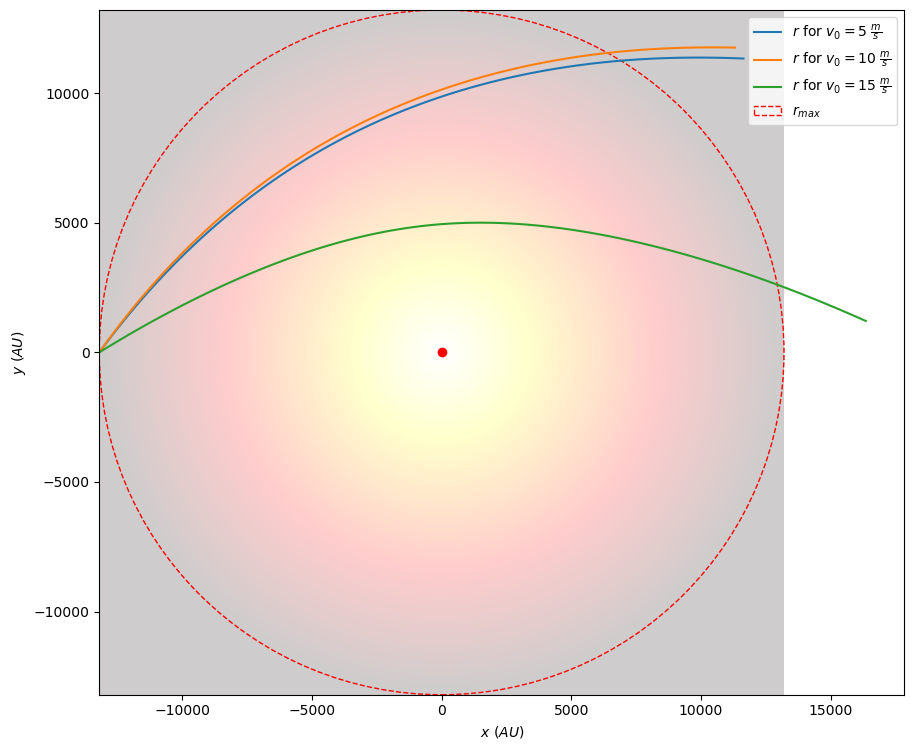

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def create_gradient_circle(ax, center, radius, color):
    # Create a grid of points within the circle
    num_points = 500
    x = np.linspace(-radius, radius, num_points)
    y = np.linspace(-radius, radius, num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 + Y**2)

    gradient = np.clip(1 - Z / radius, 0, 1)

    ax.imshow(gradient, extent=[-radius, radius, -radius, radius], origin='lower', cmap='hot', alpha=0.2)

plt.clf()

fig, ax = plt.subplots(figsize=(10, 8))
indices = [1, 2, 3]
v0 = {1: 5, 2: 10, 3: 15}

for i in indices:
    ax.plot(meters_to_au(x[i]), meters_to_au(y[i]), label=f'$r$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

create_gradient_circle(ax, (0, 0), rmax, 'r')

circle = Circle((0, 0), rmax, color='r', fill=False, linestyle='--', label='$r_{max}$')
ax.add_patch(circle)

ax.plot(0, 0, 'ro')

ax.legend()
ax.set_xlabel('$x\\ \\left(AU\\right)$')
ax.set_ylabel('$y\\ \\left(AU\\right)$')
ax.set_aspect('equal', adjustable='box')  # To ensure the circle is not distorted

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

def create_gradient_circle(ax, center, radius, color):
    num_points = 500
    x = np.linspace(-radius, radius, num_points)
    y = np.linspace(-radius, radius, num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 + Y**2)
    
    gradient = np.clip(1 - Z / radius, 0, 1)
    
    ax.imshow(gradient, extent=[-radius, radius, -radius, radius], origin='lower', cmap='hot', alpha=0.4)

def animate(i):
    ax.clear()
    
    create_gradient_circle(ax, (0, 0), rmax, 'r')
    circle = Circle((0, 0), rmax, color='r', fill=False, linestyle='--', label='$r_{max}$')
    ax.add_patch(circle)
    ax.plot(0, 0, 'ro')
    
    for idx in x.keys():
        ax.plot(meters_to_au(x[idx][:i+1]), meters_to_au(y[idx][:i+1]), label=f'$r$ for $v_0 = {v0[idx]}\\ \\frac{{m}}{{s}}$')
        ax.scatter(meters_to_au(x[idx][i]), meters_to_au(y[idx][i]), s=10)
    
    ax.legend()
    ax.set_xlabel('$x\\ \\left(AU\\right)$')
    ax.set_ylabel('$y\\ \\left(AU\\right)$')
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Data to plot
indices = range(len(x[1]))  # Assuming all particles have the same number of positions
v0 = {1: 5, 2: 10, 3: 15}  # Initial velocities as provided

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create animation
ani = FuncAnimation(fig, animate, frames=len(indices), interval=100, blit=False)

# Save the animation as a GIF
output_file = os.path.expanduser('~/Downloads/planetesimal_project/animation.gif')
ani.save(output_file, writer='imagemagick', fps=10)

# Show the animation inline
plt.show()
